In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
data = pd.read_csv('MSFT_2000.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,MSFT
Date,
2017-10-12,0.009118
2017-10-13,0.004786
2017-10-16,0.002063
2017-10-17,-0.000773
2017-10-18,0.000258


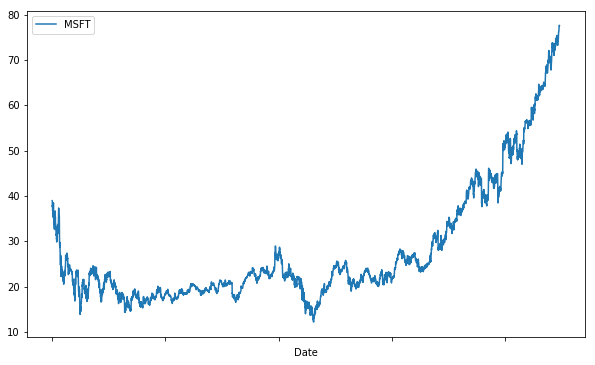

In [4]:
data.plot(figsize=(10, 6));

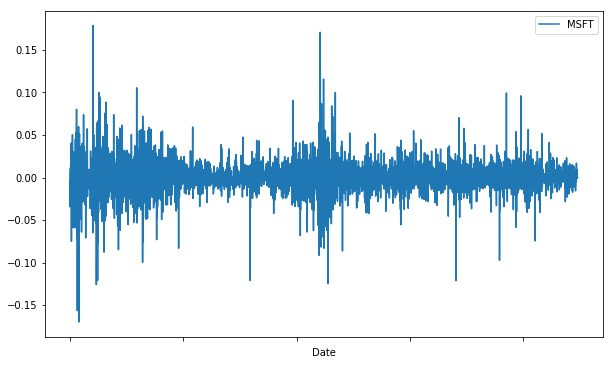

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

MSFT    0.000154
dtype: float64

In [7]:
var = log_returns.var()
var

MSFT    0.000376
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

MSFT   -0.000034
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

MSFT    0.019397
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([-3.42521946e-05])

In [13]:
drift.values

array([-3.42521946e-05])

In [14]:
stdev.values

array([0.01939682])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.02063411, 0.05212943],
       [0.63181865, 0.42819334],
       [0.90829968, 0.67259029],
       [0.12798537, 0.45184194],
       [0.00536628, 0.7069446 ],
       [0.67972938, 0.91320768],
       [0.67201752, 0.34808942],
       [0.23985505, 0.86818147],
       [0.22093652, 0.17216686],
       [0.52142652, 0.3714112 ]])

In [17]:
norm.ppf(x)

array([[-2.04082512, -1.62454818],
       [ 0.33667395, -0.18097567],
       [ 1.33035713,  0.44707706],
       [-1.13596615, -0.12100902],
       [-2.55128805,  0.54448058],
       [ 0.46694219,  1.36077553],
       [ 0.44549101, -0.39048378],
       [-0.70676892,  1.11783596],
       [-0.76903413, -0.94563708],
       [ 0.05373417, -0.32811805]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.57890947,  0.81229641],
       [-0.78267925, -0.91596639],
       [ 0.65720744,  0.15120218],
       [ 0.23334459,  0.917698  ],
       [-0.78543619,  1.09843487],
       [ 2.01150943,  0.10045518],
       [ 0.57739001, -0.34710666],
       [ 1.07965602,  0.24055198],
       [-0.68658649,  0.06707858],
       [ 0.34004955,  2.77505394]])

In [48]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [49]:
daily_returns

array([[1.03005062, 1.01305181, 0.99828732, ..., 1.00705098, 1.00961907,
        1.00072913],
       [0.99078527, 0.99808218, 1.01143411, ..., 0.98211627, 0.98608756,
        0.9727038 ],
       [0.97843787, 0.99261308, 1.00867226, ..., 1.03670727, 0.98414246,
        0.96758149],
       ...,
       [1.01907772, 1.0320548 , 0.99886708, ..., 0.99788866, 1.00334802,
        0.96642821],
       [1.01816205, 0.97404894, 0.98204753, ..., 0.98322894, 0.98206871,
        0.97623541],
       [0.9776025 , 1.02064394, 1.00522068, ..., 1.00271326, 0.98987073,
        0.98236711]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [50]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 2017-10-18, dtype: float64

In [51]:
price_list = np.zeros_like(daily_returns)

In [52]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
price_list[0] = S0
price_list

array([[77.610001, 77.610001, 77.610001, ..., 77.610001, 77.610001,
        77.610001],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [55]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [46]:
price_list

array([[ 77.610001  ,  77.610001  ,  77.610001  ,  77.610001  ,
         77.610001  ,  77.610001  ,  77.610001  ,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 76.36054899,  79.37449163,  77.24682025,  78.04371306,
         77.33468521,  78.00200206,  77.1895768 ,  78.17724711,
         79.70914063,  77.18880303],
       [ 72.93944226,  79.30193756,  78.42070224,  77.84255677,
         77.68907876,  77.67656883,  73.86463965,  77.1305674 ,
         79.6531517 ,  76.64833153],
       [ 73.10133629,  79.28580761,  79.65597503,  75.63677896,
         79.55490001,  78.37694896,  73.86161342,  75.76897381,
         82.68213767,  77.26504352],
       [ 73.22357116,  81.68579334,  79.43823028,  77.53729535,
         77.75989419,  76.40933567,  74.56365748,  75.25144947,
         81.56199137,  77.95288344],
       [ 72.78086934,  84.23474353,  77.09384595,  76.10992853,
         77.63246567,  77.21110659,  74.80984208,  74.9769606 ,
         86.30993718,  77.84099156],
       [ 7

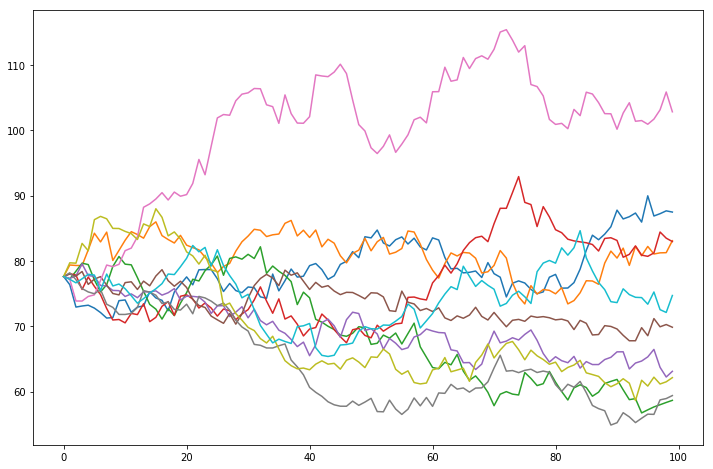

In [47]:
plt.figure(figsize=(12,8))
plt.plot(price_list);